In [38]:
import pandas as pd
data = pd.read_csv('IPG2211A2N.csv')

In [39]:
data.head()

,observation_date,IPG2211A2N
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4608
4,1939-05-01,3.4608


In [40]:
data.shape

(1030, 2)

In [41]:
data.dtypes

observation_date     object
IPG2211A2N          float64
dtype: object

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  1030 non-null   object 
 1   IPG2211A2N        1030 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.2+ KB


In [43]:
data.describe()

,IPG2211A2N
count,1030.000000
mean,56.821588
std,35.982935
min,3.333600
25%,20.968675
50%,56.909600
75%,89.590800
max,126.377200


In [44]:
from datetime import datetime

# Convertir la colonne 'observation_date' en datetime
data['observation_date'] = pd.to_datetime(data['observation_date'])

In [45]:
# Renommer la colonne 'IPG2211A2N' en 'Production'
data.rename(columns={'IPG2211A2N': 'Production'}, inplace=True)

In [46]:
data.head()

,observation_date,Production
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4608
4,1939-05-01,3.4608


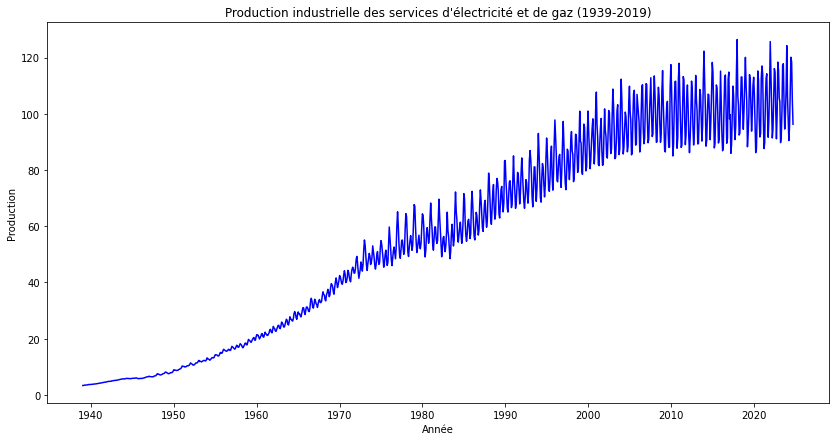

In [47]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(data['observation_date'], data['Production'], label='Production industrielle', color='blue')
plt.title('Production industrielle des services d\'électricité et de gaz (1939-2019)')
plt.xlabel('Année')
plt.ylabel('Production')
#plt.legend()
#plt.grid()
plt.show()

In [48]:
# Extraire l'année et ajouter une colonne 'année'
data['année'] = data['observation_date'].dt.year

# Calculer la moyenne de la production par année
production_par_annee = data.groupby('année')['Production'].mean().reset_index()


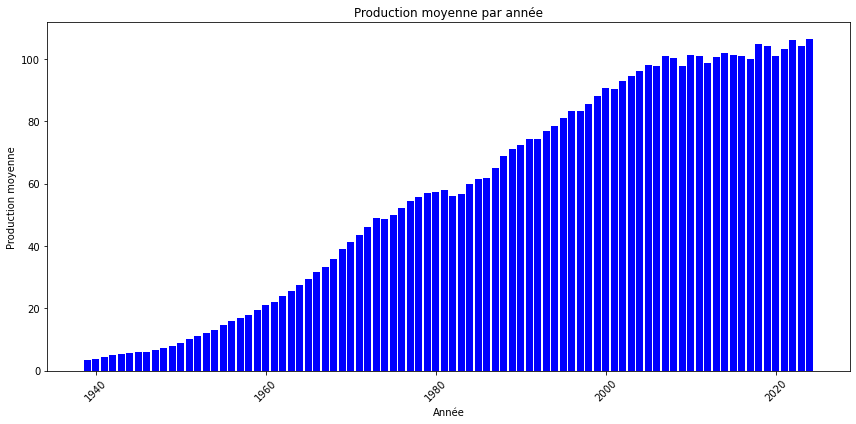

In [49]:
# Créer un graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(production_par_annee['année'], production_par_annee['Production'], color='blue')
plt.title('Production moyenne par année')
plt.xlabel('Année')
plt.ylabel('Production moyenne')
plt.xticks(rotation=45)
#plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [50]:
data.head()

,observation_date,Production,année
0,1939-01-01,3.3336,1939
1,1939-02-01,3.3591,1939
2,1939-03-01,3.4354,1939
3,1939-04-01,3.4608,1939
4,1939-05-01,3.4608,1939


In [51]:
# Ajouter une colonne pour le mois
data['mois'] = data['observation_date'].dt.month

In [52]:
def get_saison(mois):
    if mois in [3, 4, 5]:
        return 'Printemps'
    elif mois in [6, 7, 8]:
        return 'Été'
    elif mois in [9, 10, 11]:
        return 'Automne'
    else:
        return 'Hiver'

data['saison'] = data['mois'].apply(get_saison)

In [53]:
production_par_saison = data.groupby('saison')['Production'].mean().reset_index()
print(production_par_saison)

      saison  Production
0    Automne   53.836140
1      Hiver   61.631762
2  Printemps   52.942918
3        Été   58.882603


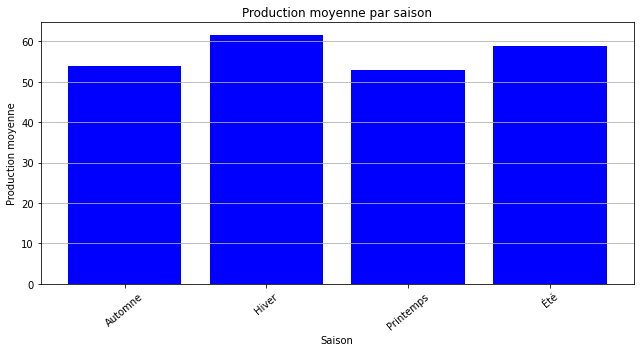

In [54]:
# Créer un bar plot
plt.figure(figsize=(9, 5))
plt.bar(production_par_saison['saison'], production_par_saison['Production'], color='blue')
plt.title('Production moyenne par saison')
plt.xlabel('Saison')
plt.ylabel('Production moyenne')
plt.xticks(rotation=40)
plt.grid(axis='y')

# Afficher le diagramme
plt.tight_layout()
plt.show()

In [55]:
data.head()

,observation_date,Production,année,mois,saison
0,1939-01-01,3.3336,1939,1,Hiver
1,1939-02-01,3.3591,1939,2,Hiver
2,1939-03-01,3.4354,1939,3,Printemps
3,1939-04-01,3.4608,1939,4,Printemps
4,1939-05-01,3.4608,1939,5,Printemps


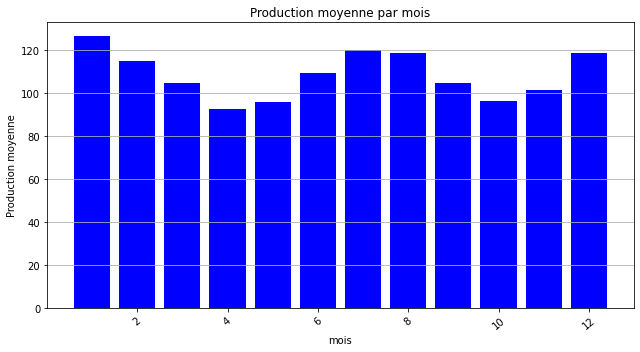

In [56]:
# Créer un bar plot
plt.figure(figsize=(9, 5))
plt.bar(data['mois'], data['Production'], color='blue')
plt.title('Production moyenne par mois')
plt.xlabel('mois')
plt.ylabel('Production moyenne')
plt.xticks(rotation=40)
plt.grid(axis='y')

# Afficher le diagramme
plt.tight_layout()
plt.show()

In [57]:
print(data.describe())

        Production        année         mois
count  1030.000000  1030.000000  1030.000000
mean     56.821588  1981.417476     6.490291
std      35.982935    24.789698     3.449962
min       3.333600  1939.000000     1.000000
25%      20.968675  1960.000000     3.250000
50%      56.909600  1981.000000     6.000000
75%      89.590800  2003.000000     9.000000
max     126.377200  2024.000000    12.000000


In [58]:
# Supposons que votre DataFrame s'appelle df
data['saison'] = data['saison'].replace({'Hiver': 1, 'Printemps': 2, 'Été': 3, 'Automne': 4})

# Vérifier le résultat
print(data.head())


  observation_date  Production  année  mois  saison
0       1939-01-01      3.3336   1939     1       1
1       1939-02-01      3.3591   1939     2       1
2       1939-03-01      3.4354   1939     3       2
3       1939-04-01      3.4608   1939     4       2
4       1939-05-01      3.4608   1939     5       2


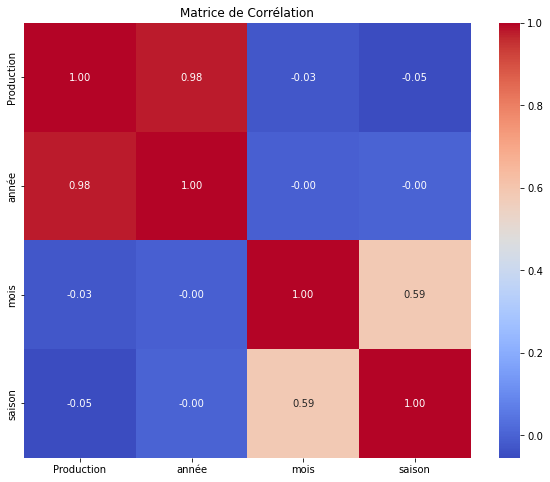

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que vous ayez un DataFrame df
corr_matrix = data.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()


In [60]:
data.to_csv('data_production')